In [141]:
import os
import random

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold , StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
import statsmodels.api as sm


df = pd.read_csv('K-League-data.csv').drop(columns='Unnamed: 0')
print(df.shape)
df.head(1)

df2 = pd.read_csv('K-League-data2.csv').drop(columns='Unnamed: 0')
print(df2.shape)
df2.head(1)


(1332, 52)
(666, 100)


,Rnd.,대회,홈 득점,홈 도움,홈 슈팅,홈 유효 슈팅,홈 블락된슈팅,홈 벗어난슈팅,홈 PA내 슈팅,홈 PA외 슈팅,...,원정 피파울,원정 경고,원정 퇴장,원정,원정 경기결과,원정 소속 선수 수,원정 평균 나이,원정 용병 수,원정 평균 가치,원정 총 가치
0,1,대구vs수원FC,1,1,13,4,2,7,5,8,...,13,3,0,suwonFC,D,36,25.6,5,350.0,12.6


In [97]:
def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [98]:
X = df.drop(columns=['경기결과', '기준', '소속 선수 수', '총 가치'])
X = pd.get_dummies(X, columns=['대회', 'H/A', '시즌'], drop_first=False)

y = df['경기결과']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# scaler = StandardScaler()  
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1198, 228) (134, 228)
(1198,) (134,)


In [99]:
# 다항 로지스틱 회귀

model = LogisticRegression(random_state=42, solver='newton-cg',max_iter=500)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6343283582089553
              precision    recall  f1-score   support

           0       0.53      0.51      0.52        41
           1       0.70      0.73      0.72        52
           2       0.65      0.63      0.64        41

    accuracy                           0.63       134
   macro avg       0.63      0.63      0.63       134
weighted avg       0.63      0.63      0.63       134

[[21 11  9]
 [ 9 38  5]
 [10  5 26]]


In [5]:
# OLS

# results = sm.OLS(y_train,sm.add_constant(X_train_scaled)).fit()
# print(results.summary())

In [6]:
# y_pred = results.predict(X_test_scaled)
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

In [100]:
# 다층신경망

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=42, max_iter=500)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6268656716417911
              precision    recall  f1-score   support

           0       0.63      0.59      0.61        41
           1       0.62      0.69      0.65        52
           2       0.63      0.59      0.61        41

    accuracy                           0.63       134
   macro avg       0.63      0.62      0.62       134
weighted avg       0.63      0.63      0.63       134

[[24 11  6]
 [ 8 36  8]
 [ 6 11 24]]


In [101]:
# LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6119402985074627
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        41
           1       0.64      0.69      0.67        52
           2       0.65      0.59      0.62        41

    accuracy                           0.61       134
   macro avg       0.61      0.60      0.61       134
weighted avg       0.61      0.61      0.61       134

[[22 12  7]
 [10 36  6]
 [ 9  8 24]]


In [102]:
# QDA

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.3805970149253731
              precision    recall  f1-score   support

           0       0.39      0.95      0.55        41
           1       0.14      0.02      0.03        52
           2       0.41      0.27      0.32        41

    accuracy                           0.38       134
   macro avg       0.31      0.41      0.30       134
weighted avg       0.30      0.38      0.28       134

[[39  0  2]
 [37  1 14]
 [24  6 11]]


In [103]:
# SVM

from sklearn import svm

model = svm.SVC(random_state=42, kernel='linear')
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6194029850746269
              precision    recall  f1-score   support

           0       0.49      0.51      0.50        41
           1       0.69      0.63      0.66        52
           2       0.67      0.71      0.69        41

    accuracy                           0.62       134
   macro avg       0.62      0.62      0.62       134
weighted avg       0.62      0.62      0.62       134

[[21 11  9]
 [14 33  5]
 [ 8  4 29]]


In [104]:
# 그래디언트부스팅

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42, max_depth=3, n_estimators=500, )
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:20]

Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.35      0.29      0.32        41
           1       0.60      0.58      0.59        52
           2       0.50      0.61      0.55        41

    accuracy                           0.50       134
   macro avg       0.48      0.49      0.49       134
weighted avg       0.49      0.50      0.49       134

[[12 17 12]
 [ 9 30 13]
 [13  3 25]]


,Feature,Importance
1,득점,0.290366
32,클리어링,0.049897
22,수비진영 패스,0.023804
36,블락,0.023501
46,총 가치,0.022332
31,태클,0.021092
0,Rnd.,0.020153
35,획득,0.019531
30,경합 공중,0.018388
27,크로스,0.018376


In [105]:
# 에이다 부스트

from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=42,)
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:20]

Accuracy: 0.5373134328358209
              precision    recall  f1-score   support

           0       0.40      0.41      0.40        41
           1       0.66      0.56      0.60        52
           2       0.55      0.63      0.59        41

    accuracy                           0.54       134
   macro avg       0.54      0.54      0.53       134
weighted avg       0.55      0.54      0.54       134

[[17 11 13]
 [15 29  8]
 [11  4 26]]


,Feature,Importance
1,득점,0.16
24,롱패스,0.06
34,차단,0.06
32,클리어링,0.06
146,대회_수원vs광주,0.06
46,총 가치,0.04
27,크로스,0.04
31,태클,0.04
22,수비진영 패스,0.04
141,대회_수원FCvs인천,0.02


In [106]:
# lightgbm

import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(random_state=42, max_depth=3, n_estimators=500)
lgb_model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:20]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3548
[LightGBM] [Info] Number of data points in the train set: 1198, number of used features: 52
[LightGBM] [Info] Start training from score -1.221941
[LightGBM] [Info] Start training from score -1.055323
[LightGBM] [Info] Start training from score -1.029286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

,Feature,Importance
1,득점,0.16
24,롱패스,0.06
34,차단,0.06
32,클리어링,0.06
146,대회_수원vs광주,0.06
46,총 가치,0.04
27,크로스,0.04
31,태클,0.04
22,수비진영 패스,0.04
141,대회_수원FCvs인천,0.02


In [107]:
# randomforest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:20]

Accuracy: 0.4925373134328358
              precision    recall  f1-score   support

           0       0.26      0.12      0.17        41
           1       0.57      0.65      0.61        52
           2       0.49      0.66      0.56        41

    accuracy                           0.49       134
   macro avg       0.44      0.48      0.45       134
weighted avg       0.45      0.49      0.46       134

[[ 5 19 17]
 [ 7 34 11]
 [ 7  7 27]]


,Feature,Importance
1,득점,0.084274
2,도움,0.041885
32,클리어링,0.031226
22,수비진영 패스,0.026036
4,유효 슈팅,0.024471
20,횡패스,0.023443
30,경합 공중,0.023178
27,크로스,0.023100
35,획득,0.022857
29,경합 지상,0.022383


In [108]:
# XgBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = XGBClassifier()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:20]

Accuracy: 0.4701492537313433
              precision    recall  f1-score   support

           0       0.28      0.22      0.25        41
           1       0.59      0.56      0.57        52
           2       0.47      0.61      0.53        41

    accuracy                           0.47       134
   macro avg       0.45      0.46      0.45       134
weighted avg       0.46      0.47      0.46       134

[[ 9 16 16]
 [11 29 12]
 [12  4 25]]


,Feature,Importance
1,득점,0.074874
58,대회_강원vs제주,0.044678
214,대회_포항vs대전,0.030367
154,대회_수원vs인천,0.029746
95,대회_대구vs포항,0.028914
145,대회_수원vs강원,0.024555
107,대회_서울vs강원,0.024305
141,대회_수원FCvs인천,0.023635
84,대회_대구vs광주,0.021431
85,대회_대구vs김천,0.020187


In [112]:
# CatBoost
from catboost import CatBoostClassifier


model = CatBoostClassifier(random_seed=42, metric_period=100, depth=4)

model.fit(X_train_scaled, y_train)  # Specify categorical features

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:20]

Learning rate set to 0.079859
0:	learn: 1.0687248	total: 5.19ms	remaining: 5.19s
100:	learn: 0.7530262	total: 229ms	remaining: 2.04s
200:	learn: 0.6535224	total: 447ms	remaining: 1.78s
300:	learn: 0.5770739	total: 660ms	remaining: 1.53s
400:	learn: 0.5184868	total: 872ms	remaining: 1.3s
500:	learn: 0.4730409	total: 1.09s	remaining: 1.09s
600:	learn: 0.4327884	total: 1.31s	remaining: 871ms
700:	learn: 0.3961628	total: 1.54s	remaining: 656ms
800:	learn: 0.3642380	total: 1.76s	remaining: 437ms
900:	learn: 0.3372204	total: 1.98s	remaining: 217ms
999:	learn: 0.3131965	total: 2.19s	remaining: 0us
Accuracy: 0.5447761194029851
              precision    recall  f1-score   support

           0       0.39      0.27      0.32        41
           1       0.67      0.69      0.68        52
           2       0.50      0.63      0.56        41

    accuracy                           0.54       134
   macro avg       0.52      0.53      0.52       134
weighted avg       0.53      0.54      0.53    

,Feature,Importance
1,득점,20.512553
32,클리어링,5.196072
35,획득,3.004793
46,총 가치,2.792047
27,크로스,2.791478
24,롱패스,2.716701
29,경합 지상,2.685336
34,차단,2.684753
31,태클,2.667340
22,수비진영 패스,2.601730


# PCA


In [113]:
from sklearn.decomposition import PCA

# 가정: df가 DataFrame인 경우
X = df.drop(columns=['경기결과', '기준'])
X = pd.get_dummies(X, columns=['대회', 'H/A', '시즌'], drop_first=True)

y = df['경기결과']

# LabelEncoder를 대상 변수 'y'에 직접 적용
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# pca 적용 : 정확도 95%가 될때까지
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 성능이 제일 괜찮은 회귀기반 모델
model = LogisticRegression(random_state=42, solver='newton-cg', max_iter=500)
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f'정확도: {accuracy}')
print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

# pca 이후 성능 유지

정확도: 0.6194029850746269
              precision    recall  f1-score   support

           0       0.57      0.41      0.48        41
           1       0.65      0.75      0.70        52
           2       0.61      0.66      0.64        41

    accuracy                           0.62       134
   macro avg       0.61      0.61      0.60       134
weighted avg       0.61      0.62      0.61       134



In [114]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                           'Proportion of variance': pca.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156
Standard deviation,0.5939,0.5525,0.5108,0.4440,0.3455,0.3204,0.3112,0.2964,0.2952,0.2418,...,0.0686,0.0681,0.0677,0.0671,0.0660,0.0654,0.0650,0.0646,0.0642,0.0639
Proportion of variance,0.1078,0.0933,0.0798,0.0603,0.0365,0.0314,0.0296,0.0269,0.0266,0.0179,...,0.0014,0.0014,0.0014,0.0014,0.0013,0.0013,0.0013,0.0013,0.0013,0.0012
Cumulative proportion,0.1078,0.2012,0.2810,0.3412,0.3777,0.4091,0.4387,0.4656,0.4922,0.5101,...,0.9389,0.9403,0.9417,0.9431,0.9444,0.9457,0.9470,0.9483,0.9495,0.9508


In [115]:
contributions_df = pd.DataFrame(pca.components_, columns=X.columns)

print(contributions_df.abs().sum(axis=0).sort_values(ascending=False)[:28])
# 서울 vs 성남? 
# 서울 : 1승 1무 2패
# 성남 : 2승 1무 1패 
# 성남 2승의 경기 지표상, 서울이 경기력은 좋았으나 패배한 경우임. 
# 절댓값으로 더했으니 실패한 예측력에 기여했을듯

차단             8.529684
대회_인천vs대구      8.477757
클리어링           8.427554
대회_수원vs대구      8.356949
블락             8.350296
키패스            8.337414
대회_대구vs제주      8.228254
대회_강원vs인천      8.197517
획득             8.194549
대회_전북vs울산      8.132815
대회_수원vs제주      8.127350
대회_전북vs인천      8.077724
대회_강원vs전북      8.014506
대회_수원vs울산      8.002739
대회_제주vs대구      7.962018
공격진영 패스        7.884280
대회_서울vs성남      7.846197
대회_대구vs포항      7.821292
롱패스            7.798662
대회_제주vs수원FC    7.796165
대회_전북vs제주      7.791390
대회_수원vs강원      7.783522
대회_인천vs수원FC    7.774685
대회_대구vs서울      7.769256
대회_수원FCvs강원    7.740753
대회_서울vs울산      7.739460
인터셉트           7.724103
대회_서울vs강원      7.721244
dtype: float64


In [116]:
# print(contributions_df.abs().sum(axis=0).sort_values(ascending=False)[28:56])
# 구단 vs 구단이 주로 구성

In [117]:
print(contributions_df.abs().sum(axis=0).sort_values(ascending=False)[56:84])
# 도움이 득점보다 영향력이 높네,,
# 횡패스도 높았음

대회_울산vs강원      7.356615
대회_서울vs대구      7.342539
대회_울산vs수원      7.330036
횡패스            7.321087
대회_수원FCvs울산    7.309764
대회_성남vs울산      7.309452
대회_수원vs전북      7.300302
대회_전북vs서울      7.285003
대회_포항vs수원FC    7.281292
도움             7.275277
대회_성남vs포항      7.249329
득점             7.235037
대회_대구vs수원      7.218230
크로스            7.207202
대회_전북vs강원      7.202164
대회_울산vs대구      7.179829
대회_수원FCvs수원    7.148328
대회_수원FCvs포항    7.139317
대회_강원vs수원FC    7.123498
대회_수원vs포항      7.077885
대회_인천vs전북      7.063415
대회_전북vs수원      7.061838
대회_포항vs수원      7.061286
대회_울산vs서울      6.961195
대회_포항vs서울      6.893744
대회_대구vs인천      6.892823
대회_강원vs수원      6.877159
대회_대구vs울산      6.866363
dtype: float64


In [118]:
print(contributions_df.abs().sum(axis=0).sort_values(ascending=False)[146:156])

소속 선수 수        5.623336
태클             5.452972
탈압박            5.360130
대회_제주vs전북      5.322418
대회_수원FCvs광주    5.282182
용병 수           5.228287
대회_수원vs수원FC    5.001900
퇴장             4.814241
대회_전북vs포항      4.729139
드리블            4.112648
dtype: float64


In [119]:
from sklearn.decomposition import PCA

# 가정: df가 DataFrame인 경우
X = df.drop(columns=['경기결과', '기준'])
X = pd.get_dummies(X, columns=['대회', 'H/A', '시즌'], drop_first=True)

y = df['경기결과']

# LabelEncoder를 대상 변수 'y'에 직접 적용
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# pca 적용 : 정확도 95%가 될때까지
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 성능이 제일 괜찮은 트리기반 모델
model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)

# 모델 평가
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# pca 이후 성능 유지 못함

Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.55      0.39      0.46        41
           1       0.48      0.52      0.50        52
           2       0.49      0.59      0.53        41

    accuracy                           0.50       134
   macro avg       0.51      0.50      0.50       134
weighted avg       0.51      0.50      0.50       134

[[16 16  9]
 [ 9 27 16]
 [ 4 13 24]]


# 변수 선택법 - 단계적 선택법 ( stepwise selection )

In [25]:
# # 변수선택을 통해 형성한 모델의 aic 를 구함
# # aic가 낮을 수록 모델이 좋다고 평가

# def processSubset(X, y, feature_set):
#     model = sm.OLS(y, sm.add_constant(X[feature_set])) # Modeling
#     regr = model.fit() # model fitting
#     AIC = regr.aic # model's AIC
#     return {"model" : regr, "AIC" : AIC}

# processSubset(X=X_train, y= y_train, feature_set=X.columns)


In [26]:
# import time
# import itertools

# def processSubset(X, y, feature_set):
#     model = sm.OLS(y, sm.add_constant(X[feature_set]))  # feature_set으로 X 선택
#     regr = model.fit()  # model fitting
#     AIC = regr.aic  # model's AIC
#     return {"model": regr, "AIC": AIC}

# def getBest(X, y, k):
#     tic = time.time()
#     results = []  # 결과 저장 공간
#     for combo in itertools.combinations(X.columns.difference(['const']), k):
#         # 각 변수 조합을 고려한 경우의 수
#         combo = (list(combo) + ['const'])
#         # 상수항을 추가하여 combo를 결성
#         results.append(processSubset(X, y, feature_set=combo))  # 모델링된 것을 저장

#         # 만약 k=2이면 여기서 두가지 변수만 뽑아서 경우의 수를 분석하여
#         # 저장 후 그 중 AIC가 가장 낮은 모델을 선택하도록 함

#     models = pd.DataFrame(results)  # 데이터프레임으로 모델결과 변환
#     best_model = models.loc[models['AIC'].idxmin()]  # idxmin은 최소값의 인덱스를 뽑는 함수

#     toc = time.time()
#     print("Processed", models.shape[0], "models on", k, "predictors in", (toc - tic), "seconds.")

#     return best_model

# # X_train_scaled을 사용하려면 해당 데이터프레임에 'const' 열을 추가해야 합니다.
# X_train['const'] = 1

# print(getBest(X=X_train, y=y_train, k=2))


In [27]:
# models = pd.DataFrame(columns=["AIC","model"])
# tic = time.time()
# for i in range(1,4):
# 	models.loc[i] = getBest(X=X_train, y=y_train,k=i)
# toc = time.time()
# print("Total elapsed time:",(toc-tic),"seconds.")

# # i=3 1시간 걸림. i=2까지만 계산 

In [28]:
# OLS분석에서 다중공선성의 문제가 있을 수 있다고 했음. 
# 변수 선택법을 통해 변수를 줄이며 모델의 신뢰도를 높일 수 있음.

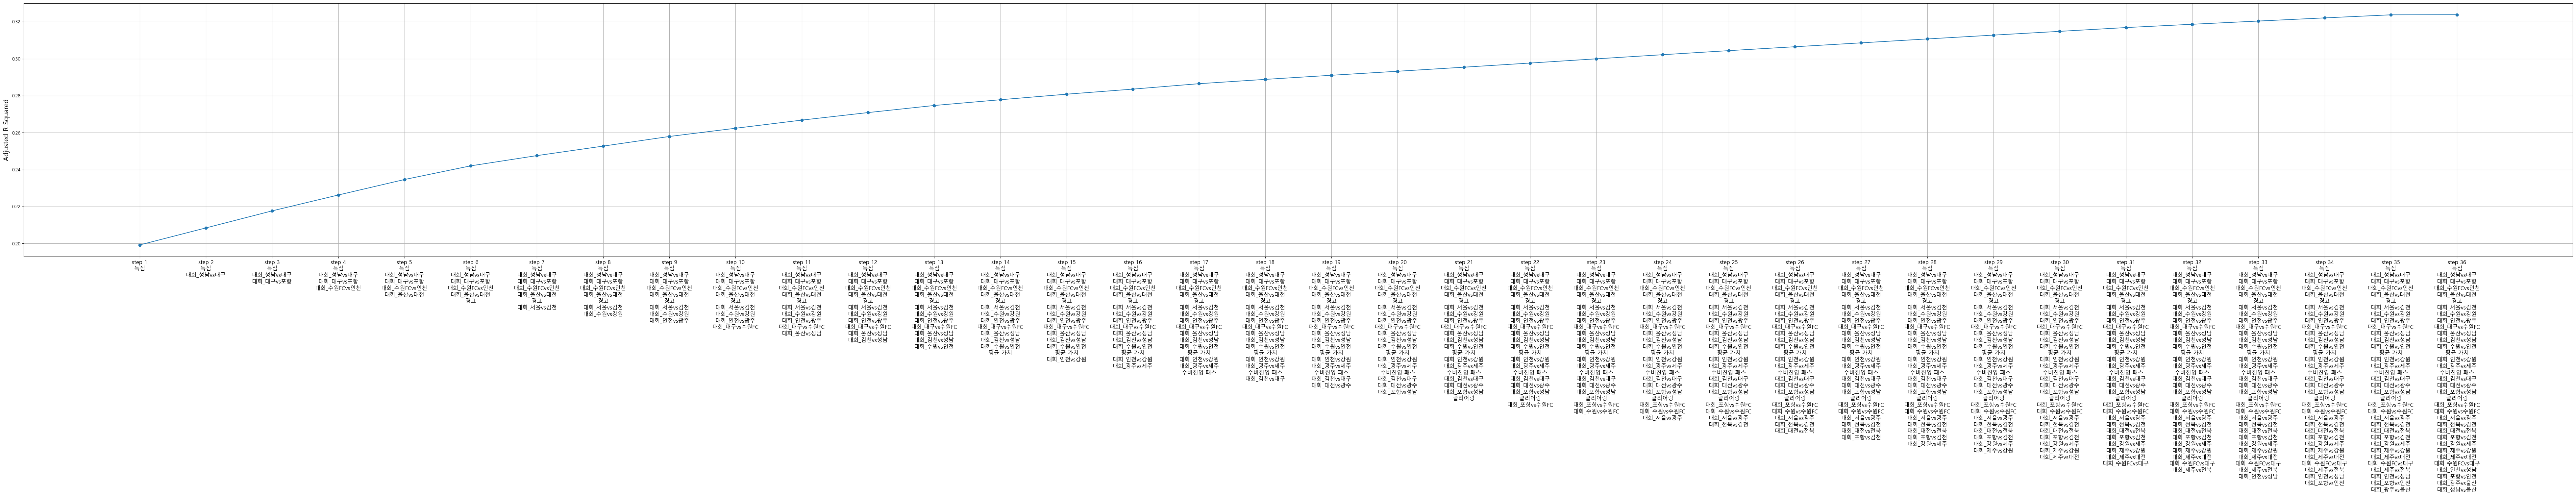

In [121]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    plt.rcParams['font.family'] = 'Malgun Gothic'

    
    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            
            X = X_train[selected_variables+[col]]
            # print(X)
            X = sm.add_constant(X)
            # print(type(X))
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(100,10))
    fig.set_facecolor('white')
    
    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')
      
    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables
    


# X_train에서 불리언 열만 선택
boolean_columns = X_train.select_dtypes(include='bool').columns
# 선택된 불리언 열을 정수(0 또는 1)로 변환
X_train[boolean_columns] = X_train[boolean_columns].astype(int)

selected_variables = stepwise_feature_selection(X_train, y_train)

In [122]:
selected_variables

['득점',
 '대회_성남vs대구',
 '대회_대구vs포항',
 '대회_수원FCvs인천',
 '대회_울산vs대전',
 '경고',
 '대회_서울vs김천',
 '대회_수원vs강원',
 '대회_인천vs광주',
 '대회_대구vs수원FC',
 '대회_울산vs성남',
 '대회_김천vs성남',
 '대회_수원vs인천',
 '평균 가치',
 '대회_인천vs강원',
 '대회_광주vs제주',
 '수비진영 패스',
 '대회_김천vs대구',
 '대회_대전vs광주',
 '대회_포항vs성남',
 '클리어링',
 '대회_포항vs수원FC',
 '대회_수원vs수원FC',
 '대회_서울vs광주',
 '대회_전북vs김천',
 '대회_대전vs전북',
 '대회_포항vs김천',
 '대회_강원vs제주',
 '대회_제주vs강원',
 '대회_제주vs대전',
 '대회_수원FCvs대구',
 '대회_인천vs성남',
 '대회_포항vs인천',
 '대회_광주vs울산',
 '대회_성남vs울산']

# 변수 선택법을 통해 얻은 변수로만 승부 예측하기

In [123]:
selected_X_train = X_train[selected_variables]
selected_X_test = X_test[selected_variables]

# 확인
print(selected_X_train.shape, selected_X_test.shape)
print(y_train.shape, y_test.shape)

(1198, 35) (134, 35)
(1198,) (134,)


In [125]:
scaler = RobustScaler()
selected_X_train_scaled = scaler.fit_transform(selected_X_train)
selected_X_test_scaled = scaler.transform(selected_X_test)

In [126]:
# 변수 선택법 적용한 다항 로지스틱 회귀

model = LogisticRegression(random_state=42, solver='newton-cg',max_iter=500)
model.fit(selected_X_train_scaled, y_train)

y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5298507462686567
              precision    recall  f1-score   support

           0       0.39      0.27      0.32        41
           1       0.58      0.71      0.64        52
           2       0.55      0.56      0.55        41

    accuracy                           0.53       134
   macro avg       0.51      0.51      0.50       134
weighted avg       0.51      0.53      0.51       134

[[11 17 13]
 [ 9 37  6]
 [ 8 10 23]]


In [127]:
# 다층신경망

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=42, max_iter=500)
model.fit(selected_X_train_scaled, y_train)

y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5447761194029851
              precision    recall  f1-score   support

           0       0.40      0.44      0.42        41
           1       0.63      0.60      0.61        52
           2       0.60      0.59      0.59        41

    accuracy                           0.54       134
   macro avg       0.54      0.54      0.54       134
weighted avg       0.55      0.54      0.55       134

[[18 13 10]
 [15 31  6]
 [12  5 24]]


In [128]:
# LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(selected_X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.582089552238806
              precision    recall  f1-score   support

           0       0.61      0.27      0.37        41
           1       0.57      0.83      0.68        52
           2       0.59      0.59      0.59        41

    accuracy                           0.58       134
   macro avg       0.59      0.56      0.55       134
weighted avg       0.59      0.58      0.56       134

[[11 20 10]
 [ 2 43  7]
 [ 5 12 24]]


In [129]:
# SVM

from sklearn import svm

model = svm.SVC(random_state=42, kernel='linear')
model.fit(selected_X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5671641791044776
              precision    recall  f1-score   support

           0       0.48      0.24      0.32        41
           1       0.59      0.81      0.68        52
           2       0.57      0.59      0.58        41

    accuracy                           0.57       134
   macro avg       0.55      0.55      0.53       134
weighted avg       0.55      0.57      0.54       134

[[10 19 12]
 [ 4 42  6]
 [ 7 10 24]]


In [130]:
# 그래디언트부스팅

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42, max_depth=3, n_estimators=500, )
model.fit(selected_X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:20]

Accuracy: 0.4925373134328358
              precision    recall  f1-score   support

           0       0.36      0.39      0.37        41
           1       0.58      0.50      0.54        52
           2       0.55      0.59      0.56        41

    accuracy                           0.49       134
   macro avg       0.49      0.49      0.49       134
weighted avg       0.50      0.49      0.49       134

[[16 13 12]
 [18 26  8]
 [11  6 24]]


,Feature,Importance
0,득점,0.368926
16,수비진영 패스,0.207123
20,클리어링,0.149221
13,평균 가치,0.100089
5,경고,0.050139
12,대회_수원vs인천,0.010320
2,대회_대구vs포항,0.009997
1,대회_성남vs대구,0.009272
4,대회_울산vs대전,0.008280
9,대회_대구vs수원FC,0.006914


In [131]:
# 에이다 부스트

from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=42,)
model.fit(selected_X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:20]

Accuracy: 0.5746268656716418
              precision    recall  f1-score   support

           0       0.54      0.32      0.40        41
           1       0.60      0.75      0.67        52
           2       0.56      0.61      0.58        41

    accuracy                           0.57       134
   macro avg       0.57      0.56      0.55       134
weighted avg       0.57      0.57      0.56       134

[[13 16 12]
 [ 5 39  8]
 [ 6 10 25]]


,Feature,Importance
0,득점,0.16
16,수비진영 패스,0.14
20,클리어링,0.12
5,경고,0.04
12,대회_수원vs인천,0.04
33,대회_광주vs울산,0.02
31,대회_인천vs성남,0.02
30,대회_수원FCvs대구,0.02
29,대회_제주vs대전,0.02
28,대회_제주vs강원,0.02


In [132]:
# lightgbm

import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(random_state=42, max_depth=3, n_estimators=500)
lgb_model.fit(selected_X_train_scaled, y_train)

y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:20]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 1198, number of used features: 5
[LightGBM] [Info] Start training from score -1.221941
[LightGBM] [Info] Start training from score -1.055323
[LightGBM] [Info] Start training from score -1.029286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

,Feature,Importance
0,득점,0.16
16,수비진영 패스,0.14
20,클리어링,0.12
5,경고,0.04
12,대회_수원vs인천,0.04
33,대회_광주vs울산,0.02
31,대회_인천vs성남,0.02
30,대회_수원FCvs대구,0.02
29,대회_제주vs대전,0.02
28,대회_제주vs강원,0.02


In [140]:
# randomforest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, max_depth=3)
model.fit(selected_X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:20]

Accuracy: 0.5373134328358209
              precision    recall  f1-score   support

           0       0.33      0.02      0.05        41
           1       0.54      0.85      0.66        52
           2       0.54      0.66      0.59        41

    accuracy                           0.54       134
   macro avg       0.47      0.51      0.43       134
weighted avg       0.48      0.54      0.45       134

[[ 1 24 16]
 [ 1 44  7]
 [ 1 13 27]]


,Feature,Importance
0,득점,0.329997
20,클리어링,0.125022
13,평균 가치,0.120852
16,수비진영 패스,0.110672
2,대회_대구vs포항,0.053048
15,대회_광주vs제주,0.026219
5,경고,0.025213
3,대회_수원FCvs인천,0.020469
28,대회_제주vs강원,0.018568
4,대회_울산vs대전,0.018544


In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize XGBoost model
model = XGBClassifier()

# Train the model
model.fit(selected_X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(selected_X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:20]

Accuracy: 0.47761194029850745
              precision    recall  f1-score   support

           0       0.33      0.34      0.34        41
           1       0.56      0.52      0.54        52
           2       0.52      0.56      0.54        41

    accuracy                           0.48       134
   macro avg       0.47      0.47      0.47       134
weighted avg       0.48      0.48      0.48       134

[[14 14 13]
 [17 27  8]
 [11  7 23]]


,Feature,Importance
0,득점,0.185216
2,대회_대구vs포항,0.076354
10,대회_울산vs성남,0.046150
9,대회_대구vs수원FC,0.042707
1,대회_성남vs대구,0.038985
3,대회_수원FCvs인천,0.035938
6,대회_서울vs김천,0.035261
14,대회_인천vs강원,0.035004
4,대회_울산vs대전,0.034660
15,대회_광주vs제주,0.034492


In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize CatBoost model
model = CatBoostClassifier(random_seed=42, metric_period=100, depth=2)

# Train the model
model.fit(selected_X_train_scaled, y_train)  # Specify categorical features

# Make predictions on the test set
y_pred = model.predict(selected_X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:20]

Learning rate set to 0.079859
0:	learn: 1.0746488	total: 1.38ms	remaining: 1.38s
100:	learn: 0.8078881	total: 84.7ms	remaining: 753ms
200:	learn: 0.7744054	total: 169ms	remaining: 673ms
300:	learn: 0.7527680	total: 254ms	remaining: 591ms
400:	learn: 0.7367759	total: 338ms	remaining: 505ms
500:	learn: 0.7205517	total: 421ms	remaining: 419ms
600:	learn: 0.7080297	total: 504ms	remaining: 335ms
700:	learn: 0.6955027	total: 588ms	remaining: 251ms
800:	learn: 0.6833078	total: 672ms	remaining: 167ms
900:	learn: 0.6725386	total: 759ms	remaining: 83.4ms
999:	learn: 0.6638768	total: 842ms	remaining: 0us
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.36      0.29      0.32        41
           1       0.60      0.62      0.61        52
           2       0.48      0.56      0.52        41

    accuracy                           0.50       134
   macro avg       0.48      0.49      0.48       134
weighted avg       0.49      0.50      0.49       134

[[12

,Feature,Importance
0,득점,54.864741
20,클리어링,12.544733
16,수비진영 패스,11.520573
13,평균 가치,11.106480
5,경고,5.356964
2,대회_대구vs포항,0.439365
12,대회_수원vs인천,0.426975
9,대회_대구vs수원FC,0.361773
1,대회_성남vs대구,0.323230
7,대회_수원vs강원,0.288956


서론 : 명확한 목적, 대략적인 보고서 구성 예고, 방법론, 보고서의 방향성

변수들 / 리그 차이 / 데이터의 차이 / 

In [74]:
print(df)

      Rnd.        대회   H/A  득점  도움  슈팅  유효 슈팅  블락된슈팅  벗어난슈팅  PA내 슈팅  ...  경고  \
0        1  대구vs수원FC  HOME   1   1  13      4      2      7       5  ...   1   
1        1    대구vs서울  HOME   0   0  10      1      3      6       7  ...   4   
2        1    제주vs포항  HOME   0   0   9      1      3      5       5  ...   2   
3        1    서울vs인천  HOME   2   1  13      7      2      4       7  ...   3   
4        1    포항vs대구  AWAY   2   1   9      4      3      2       6  ...   3   
...    ...       ...   ...  ..  ..  ..    ...    ...    ...     ...  ...  ..   
1327    38    포항vs강원  AWAY   0   0  11      0      2      9       6  ...   3   
1328    38  수원FCvs서울  HOME   0   0  10      0      5      5       5  ...   0   
1329    38    울산vs대구  AWAY   0   0   9      4      1      4       3  ...   3   
1330    38  수원FCvs수원  HOME   2   1  12      3      4      5       5  ...   2   
1331    38    울산vs대구  HOME   2   2  19      6      9      4      10  ...   1   

      퇴장       기준    시즌  경기결과  소속 선수 수 

In [65]:
# 트랜스퍼 마켓 데이터 선택적으로 넣기 아래의 조합이 최적의 정확도

X1 = df.drop(columns=['경기결과', '기준', '소속 선수 수', '총 가치'])
X1 = pd.get_dummies(X1, columns=['대회', 'H/A', '시즌'], drop_first=False)

y1 = df['경기결과']

le = LabelEncoder()
y1 = le.fit_transform(y)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.1, random_state=42)

# scaler = StandardScaler()  
scaler = MinMaxScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

print(X_train_scaled1.shape)
# 다항 로지스틱 회귀

model = LogisticRegression(random_state=42, solver='newton-cg',max_iter=500)
model.fit(X_train_scaled1, y_train1)

y_pred = model.predict(X_test_scaled1)
accuracy = accuracy_score(y_test1, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1, y_pred))

(1198, 226)
Accuracy: 0.6268656716417911
              precision    recall  f1-score   support

           0       0.57      0.51      0.54        41
           1       0.67      0.73      0.70        52
           2       0.62      0.61      0.62        41

    accuracy                           0.63       134
   macro avg       0.62      0.62      0.62       134
weighted avg       0.62      0.63      0.62       134

[[21 11  9]
 [ 8 38  6]
 [ 8  8 25]]


In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold
import pandas as pd

# 데이터 불러오기 및 전처리
# df = ...

# 특정 열들을 제외한 나머지 열들을 특성으로 선택
X1 = df.drop(columns=['경기결과', '대회', '소속 선수 수', '총 가치'])

# 더미 변수로 변환
X1 = pd.get_dummies(X1, columns=['기준', 'H/A', '시즌'], drop_first=False)

# 타겟 변수 선택
y1 = df['경기결과']

# Label Encoding
le = LabelEncoder()
y1 = le.fit_transform(y1)

# MinMaxScaler를 사용하여 특성 스케일링
scaler = RobustScaler()

# Logistic Regression 모델 생성
model = LogisticRegression(random_state=42, solver='newton-cg', max_iter=500)

# KFold를 사용한 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# 정확도를 저장할 리스트
accuracy_scores = []

for train_idx, test_idx in kfold.split(X1):
    X_train_fold, X_test_fold = X1.iloc[train_idx], X1.iloc[test_idx]
    y_train_fold, y_test_fold = y1[train_idx], y1[test_idx]

    # 특성 스케일링
    X_train_scaled_fold = scaler.fit_transform(X_train_fold)
    X_test_scaled_fold = scaler.transform(X_test_fold)

    # 모델 학습
    model.fit(X_train_scaled_fold, y_train_fold)

    # 예측
    y_pred_fold = model.predict(X_test_scaled_fold)

    # 정확도 계산 및 저장
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    accuracy_scores.append(accuracy_fold)

# 평균 정확도 출력
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("평균 정확도: {:.6f}".format(average_accuracy))


평균 정확도: 0.597643


In [95]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, RobustScaler
import pandas as pd

# 데이터 불러오기 및 전처리
# df = ...

# 특정 열들을 제외한 나머지 열들을 특성으로 선택
X1 = df.drop(columns=['경기결과', '기준', '소속 선수 수', '총 가치'])

# 더미 변수로 변환
X1 = pd.get_dummies(X1, columns=['대회', 'H/A', '시즌'], drop_first=False)

# 타겟 변수 선택
y1 = df['경기결과']

# Label Encoding
le = LabelEncoder()
y1 = le.fit_transform(y1)

# MinMaxScaler를 사용하여 특성 스케일링
scaler = RobustScaler()

# Logistic Regression 모델 생성
model = LogisticRegression(random_state=42, solver='newton-cg', max_iter= 800)

# Stratified K-Fold를 사용한 교차 검증
stratified_kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 정확도를 저장할 리스트
accuracy_scores = []

for train_idx, test_idx in stratified_kfold.split(X1, y1):
    X_train_fold, X_test_fold = X1.iloc[train_idx], X1.iloc[test_idx]
    y_train_fold, y_test_fold = y1[train_idx], y1[test_idx]

    # 특성 스케일링
    X_train_scaled_fold = scaler.fit_transform(X_train_fold)
    X_test_scaled_fold = scaler.transform(X_test_fold)

    # 모델 학습
    model.fit(X_train_scaled_fold, y_train_fold)

    # 예측
    y_pred_fold = model.predict(X_test_scaled_fold)

    # 정확도 계산 및 저장
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    accuracy_scores.append(accuracy_fold)

# 평균 정확도 출력
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("평균 정확도: {:.6f}".format(average_accuracy))


평균 정확도: 0.588573
